# Wine Quality

In [5]:
import pandas as pd
import sklearn
from sklearn import model_selection
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as matplot
from sklearn.preprocessing import StandardScaler
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [6]:
train_data = pd.read_csv('/content/wine.csv')

In [7]:
print("Dataset Shape: ",train_data.shape)

Dataset Shape:  (1599, 12)


In [8]:
train_data.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good


In [9]:
train_data['quality'].unique()

array(['bad', 'good'], dtype=object)

In [10]:
train_data['quality'] = train_data['quality'].replace({'bad':0,'good':1})

In [11]:
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# New Section

In [12]:
np.any(np.isnan(train_data))


False

In [13]:
#train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
np.all(np.isfinite(train_data))


True

In [14]:
train_data.shape

(1599, 12)

In [15]:
train_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
X = train_data.drop(['quality'],axis=1)
y= train_data['quality']

In [18]:
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y ,test_size=0.3)
X_train, X_val, y_train, y_val=sklearn.model_selection.train_test_split(X_train,y_train ,test_size=1/6)

In [19]:
print("Dataset Shape : \n")
print("X_train :",X_train.shape)
print("y_test :",X_test.shape)
print("X_val :",X_val.shape)

Dataset Shape : 

X_train : (932, 11)
y_test : (480, 11)
X_val : (187, 11)


**Display Dataset**

In [120]:
#Training Dataset
print("Training Dataset : \n")
X_train.head()

Training Dataset : 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9
996,5.6,0.660,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8
205,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8
1267,10.4,0.430,0.50,2.30,0.068,13.0,19.0,0.99600,3.10,0.87,11.4
1345,8.2,0.440,0.24,2.30,0.063,10.0,28.0,0.99613,3.25,0.53,10.2


In [121]:
#Validation Dataset
print("Validation Dataset : \n")
X_val.head()

Validation Dataset : 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1314,7.0,0.360,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1
134,7.9,1.040,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0
1218,8.2,0.400,0.31,1.9,0.082,8.0,24.0,0.99600,3.24,0.69,10.6


In [122]:
#Test dataset
print("Test Dataset : \n")
X_test.head()

Test Dataset : 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.60
1456,6.0,0.540,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55
513,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.80
880,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.90
335,11.9,0.695,0.53,3.4,0.128,7.0,21.0,0.99920,3.17,0.84,12.20


**Scaling**

In [43]:
#using standard scaler

std_scaling = StandardScaler()
X_train =std_scaling.fit_transform(X_train)
X_test =std_scaling.fit_transform(X_test)
X_val =std_scaling.fit_transform(X_val)

In [44]:
#Test dataset
print("Test Dataset : \n")
X_test

Test Dataset : 



array([[ 1.814702  , -1.95222627,  1.18653284, ..., -0.17992825,
         2.19663197, -0.3056153 ],
       [-2.03202311,  0.47145089, -0.5213712 , ...,  3.48289683,
        -0.40887019,  2.1077041 ],
       [ 0.34389534, -0.97121408,  0.63397565, ..., -0.5012287 ,
         0.29531959,  1.33199429],
       ...,
       [ 1.02272918, -1.43286688,  1.33723026, ..., -0.88678923,
        -0.90180302,  1.76294419],
       [-0.50464696,  0.58686409, -1.12416086, ...,  0.719713  ,
        -0.62012712,  0.9010444 ],
       [-1.01377235, -0.33644149, -0.67206861, ...,  2.26195514,
        -0.0567753 , -0.56418523]])

**Multinomial Logistic Regression**

In [45]:
# Train a multinomial logistic regression model


def perform_multi_logistic_reg(X,y,str_model,solver,max_iter=100,C=1,penalty=None  ):
  
  #perform regression using softmax
  softmax_reg = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver=solver,C=C, max_iter=max_iter))
  softmax_reg.fit(X, y)

  # Evaluate the training and validation accuracy
  train_acc = softmax_reg.score(X, y)
  val_acc = softmax_reg.score(X_val,y_val)
  print(f'{str_model} training accuracy: {train_acc:.4f}')
  print(f'{str_model} validation accuracy: {val_acc:.4f}')
  return train_acc,val_acc

In [131]:

# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and max_iteration=100
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e)
  perform_multi_logistic_reg(X_train, y_train,"Training Dataset",solver=e)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs
Training Dataset training accuracy: 0.7511
Training Dataset validation accuracy: 0.7487
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg
Training Dataset training accuracy: 0.7511
Training Dataset validation accuracy: 0.7487
-------------------------------------------- 

Hyper parameter - Solver:  sag
Training Dataset training accuracy: 0.7511
Training Dataset validation accuracy: 0.7487
-------------------------------------------- 

Hyper parameter - Solver:  saga
Training Dataset training accuracy: 0.7511
Training Dataset validation accuracy: 0.7487
-------------------------------------------- 



**Observations: From above execution, we observe that for different values of 'solver' hyper parameter, there is no significant change in training and validation dataset accuracy because of the underlying algorithm which works same for binary classifcation 'Wine' dataset. Therefore, we're proceeding to use solver='lbfgs' for further analysis.**

In [185]:
# Using hyper parameter - solver = "lbfgs" and max_iter=5000 and different values of 'C'
C=[0.00001, 0.0001,0.005,0.01, 0.05,0.1,0.5,1,30]
for e in C:
  print("Hyper parameter - C: ", e, "\n")
  perform_multi_logistic_reg(X_train, y_train,"Training Dataset",solver='lbfgs',max_iter=5000,C=e)
  print("-------------------------------------------- \n")

Hyper parameter - C:  1e-05 

Training Dataset training accuracy: 0.5397
Training Dataset validation accuracy: 0.5187
-------------------------------------------- 

Hyper parameter - C:  0.0001 

Training Dataset training accuracy: 0.5461
Training Dataset validation accuracy: 0.5241
-------------------------------------------- 

Hyper parameter - C:  0.005 

Training Dataset training accuracy: 0.7479
Training Dataset validation accuracy: 0.7380
-------------------------------------------- 

Hyper parameter - C:  0.01 

Training Dataset training accuracy: 0.7554
Training Dataset validation accuracy: 0.7433
-------------------------------------------- 

Hyper parameter - C:  0.05 

Training Dataset training accuracy: 0.7521
Training Dataset validation accuracy: 0.7540
-------------------------------------------- 

Hyper parameter - C:  0.1 

Training Dataset training accuracy: 0.7511
Training Dataset validation accuracy: 0.7487
-------------------------------------------- 

Hyper paramet

**Observations: From above executions, we observe that, with hyper paramater solver = 'lbfgs' and different values of 'C', as we increase 'C', the training and validation dataset accuracy increases till 'C'=1, and for 'C' values greater than 1, the training and validation accuracy remains the same.**

In [186]:
# Using hyper parameter - solver = "lbfgs" and max_iter=5000 and different values of 'C'
penalty=["l1","l2","elastic-net"]
for e in penalty:
  print("Hyper parameter - penalty: ", e, "\n")
  perform_multi_logistic_reg(X_train, y_train,"Training Dataset",solver='lbfgs',max_iter=5000,C=0.05,penalty=e)
  print("-------------------------------------------- \n")

Hyper parameter - penalty:  l1 

Training Dataset training accuracy: 0.7521
Training Dataset validation accuracy: 0.7540
-------------------------------------------- 

Hyper parameter - penalty:  l2 

Training Dataset training accuracy: 0.7521
Training Dataset validation accuracy: 0.7540
-------------------------------------------- 

Hyper parameter - penalty:  elastic-net 

Training Dataset training accuracy: 0.7521
Training Dataset validation accuracy: 0.7540
-------------------------------------------- 



**Observation: From above, we see that, for different values of penalty, the training and validation accuracy remains the same.**

**Analysis**

On trying softmax with different hyperparamters like type of penalty, strength of regularization, type of optimizer and maximum number of iterations, we can see that increasing the number. of iterations leads closer to converge.

For different solvers and penalty values, the training and testing values remains the same.

As, we increase the Hyper parameter 'C' values, we see improvement in performance. 

And for Hyper parameter : Solver='lbfgs', and C =0.05, we get validation accuracy of '0.7540'.

**Support vector machines**

In [46]:
C_list =  [0.0001,0.001, 1,10  ]
Gamma_list = [0.01,0.5,10]

def try_kernels(kernel_name,c=None,g=None,cm=True):
  print("Fitting model with {} kernal".format(kernel_name),": \n")

  if c is not None:
    model = make_pipeline(StandardScaler(),SVC(kernel=kernel_name,C=c,gamma=g))
  else:
    model = make_pipeline(StandardScaler(),SVC(kernel=kernel_name))
  
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  train_acc = model.score(X_train,y_train)
  val_acc =  model.score(X_val,y_val)
  print("Training accuracy:",train_acc)
  print("Validation accuracy:",val_acc, "\n")
  
  if cm:
    cm=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    matplot.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    matplot.xlabel("Predicted")
    matplot.ylabel("Actual")
    matplot.title("Confusion Matrix")
    matplot.show()

  print("-------------------------------------------------------------------------------- \n")
  return train_acc,val_acc

Fitting model with linear kernal : 

Training accuracy: 0.7510729613733905
Validation accuracy: 0.7593582887700535 



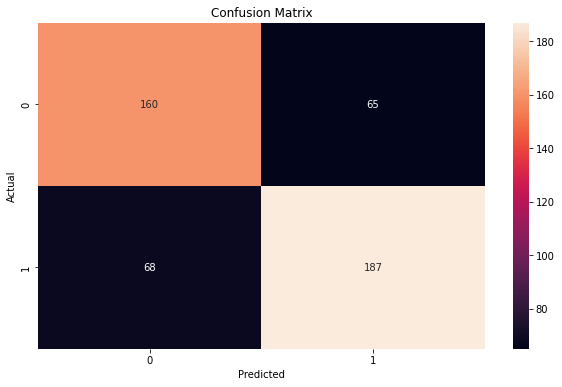

-------------------------------------------------------------------------------- 

Fitting model with poly kernal : 

Training accuracy: 0.8100858369098712
Validation accuracy: 0.7165775401069518 



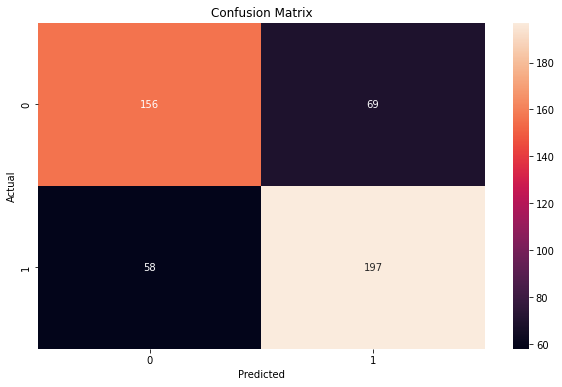

-------------------------------------------------------------------------------- 

Fitting model with sigmoid kernal : 

Training accuracy: 0.6437768240343348
Validation accuracy: 0.6256684491978609 



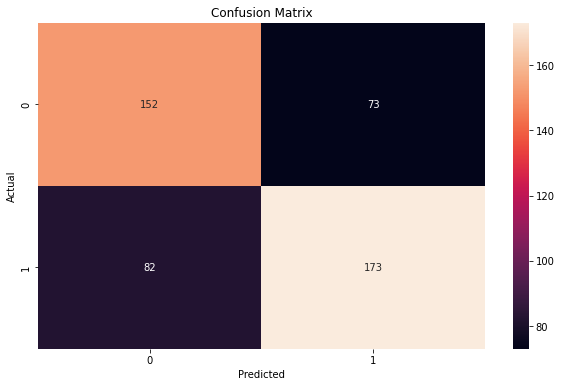

-------------------------------------------------------------------------------- 

Fitting model with rbf kernal : 

Training accuracy: 0.8068669527896996
Validation accuracy: 0.732620320855615 



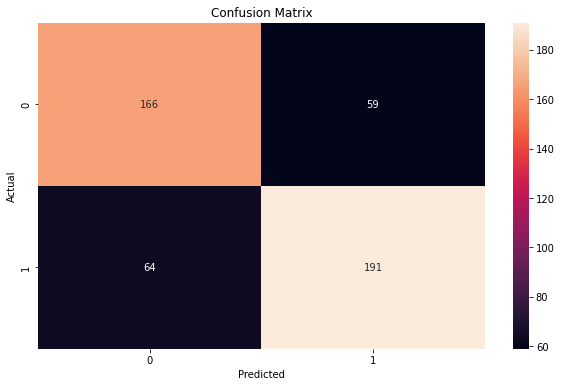

-------------------------------------------------------------------------------- 



In [201]:
kernel_list=["linear","poly", "sigmoid","rbf"]
for i in kernel_list:
  try_kernels(i)

**Observations: From above, we observe that, kernel='linear' and 'sigmoid', are not overfitting whereas other kernels are overfitting. But kernel='linear' gives better accuracy than kernel='sigmoid' on the validation dataset.**

In [203]:
#Hyper parameters: Different 'C' and 'gamma' values
for c in C_list:
  for g in Gamma_list:
    print("Hyperparamters c = ",c, "and g =", g)
    try_kernels(c=c,g=g,cm=False,kernel_name="linear")
    print()

Hyperparamters c =  0.0001 and g = 0.01
Fitting model with linear kernal : 

Training accuracy: 0.5396995708154506
Validation accuracy: 0.5187165775401069 

-------------------------------------------------------------------------------- 


Hyperparamters c =  0.0001 and g = 0.5
Fitting model with linear kernal : 

Training accuracy: 0.5396995708154506
Validation accuracy: 0.5187165775401069 

-------------------------------------------------------------------------------- 


Hyperparamters c =  0.0001 and g = 10
Fitting model with linear kernal : 

Training accuracy: 0.5396995708154506
Validation accuracy: 0.5187165775401069 

-------------------------------------------------------------------------------- 


Hyperparamters c =  0.001 and g = 0.01
Fitting model with linear kernal : 

Training accuracy: 0.7510729613733905
Validation accuracy: 0.7005347593582888 

-------------------------------------------------------------------------------- 


Hyperparamters c =  0.001 and g = 0.5
Fi

**Observations: From above execution results, we observe that, for constant value of 'C' and different values of 'g', there is no change in validation accuracy. But as the 'C' value increases, the training and validation accuracy also increases. We also observe that, after 'C'=1, as we increase 'C', the validation accuracy remains constant throughout. This might be because the equation of the decision boundary in these cases is approximatley same which is leading to same classification results.**

**Analysis of different kernels and hyper parameters**

From trying different values of kernel types, we see that there was a variation in the performance of the classifiers.

Kernel='linear' and 'sigmoid', are not overfitting whereas other kernels are overfitting. But kernel='linear' gives better accuracy than kernel='sigmoid' on the validation dataset.

For kernel='linear' and for constant value of 'C' and different values of 'g', there is no change in validation accuracy. But as the 'C' value increases, the training and validation accuracy also increases. We also observe that, after 'C'=1, as we increase 'C', the validation accuracy remains constant throughout. This might be because the equation of the decision boundary in these cases is approximatley same which is leading to same classification results.

Therefore, model with hyperparamter kernel=linear, c=10 and g=0.01 gives better performance with validation accuracy= 0.7593. 

**Random Forest Class**

In [3]:

# Define a function to perform Random Forest classification and print accuracy scores
def perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test,min_samples_leaf=1,max_leaf_nodes=None,n_estimators=100, max_depth=None,feature_analysis=False,cm=True):
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    rf_clf.fit(X_train, y_train)
    
    # Evaluate the training and validation accuracy
    train_acc = rf_clf.score(X_train, y_train)
    val_acc = rf_clf.score(X_val, y_val)
    # test_acc = rf_clf.score(X_test, y_test)
    
    print(f'Training accuracy: {train_acc:.4f}')
    print(f'Validation accuracy: {val_acc:.4f}')
    # print(f'Testing accuracy: {test_acc:.4f}')
    
    # Analyze feature importance
    if feature_analysis:
        feature_importance = rf_clf.feature_importances_
        sorted_idx = feature_importance.argsort()[::-1]
        print("Feature Importance Ranking:")
        for idx in sorted_idx:
            print(f'Feature {idx+1}: {feature_importance[idx]:.4f}')
            
            
    # Generate confusion matrix
    if cm:
      y_pred = rf_clf.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")
      
      matplot.subplots(figsize=(10, 6))
      sns.heatmap(cm, annot = True, fmt = 'g')
      matplot.xlabel("Predicted")
      matplot.ylabel("Actual")
      matplot.title("Confusion Matrix")
      matplot.show()  
    return train_acc, val_acc     
        

Training accuracy: 1.0000
Validation accuracy: 0.7273
Confusion Matrix:


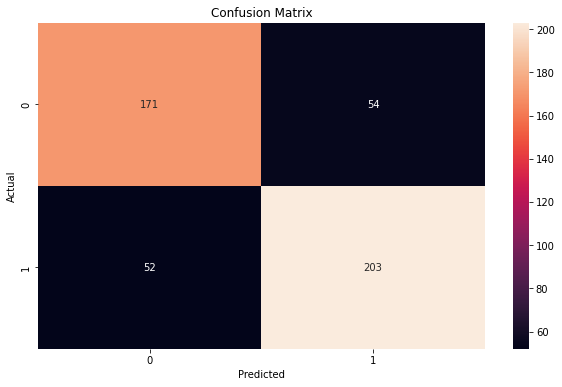

(1.0, 0.7272727272727273)

In [224]:
# Use Random Forest with default hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

Training accuracy: 0.8401
Validation accuracy: 0.7540
Confusion Matrix:


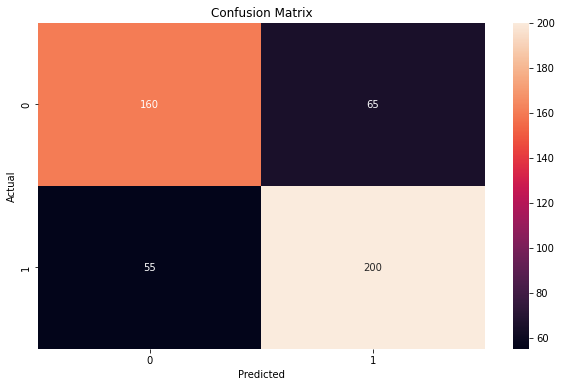

(0.8401287553648069, 0.7540106951871658)

In [225]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=500, max_depth=5)

Training accuracy: 0.9925
Validation accuracy: 0.7487
Feature Importance Ranking:
Feature 11: 0.1972
Feature 2: 0.1320
Feature 10: 0.1256
Feature 7: 0.0915
Feature 8: 0.0901
Feature 5: 0.0738
Feature 1: 0.0657
Feature 9: 0.0644
Feature 3: 0.0564
Feature 4: 0.0518
Feature 6: 0.0514
Confusion Matrix:


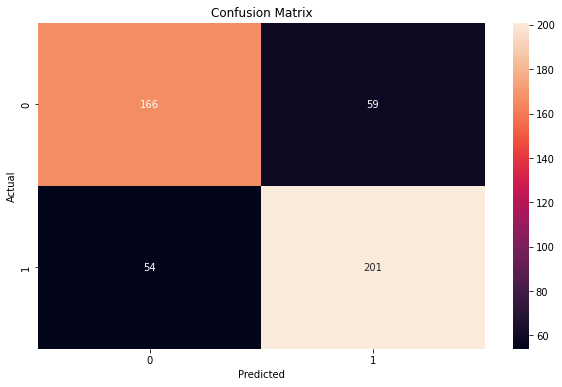

(0.9924892703862661, 0.7486631016042781)

In [226]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=10,feature_analysis=True)

Training accuracy: 0.7511
Validation accuracy: 0.7326
Confusion Matrix:


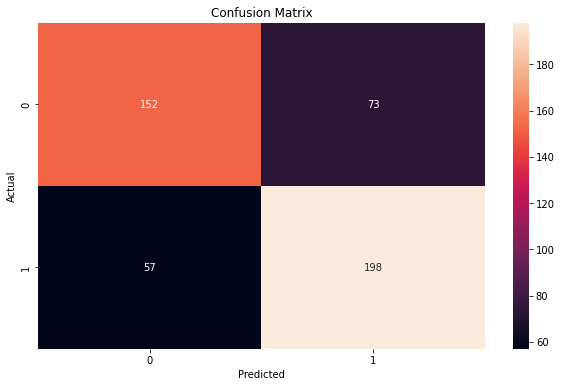

(0.7510729613733905, 0.732620320855615)

In [238]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=50, max_depth=2)

Training accuracy: 0.7618
Validation accuracy: 0.7487
Confusion Matrix:


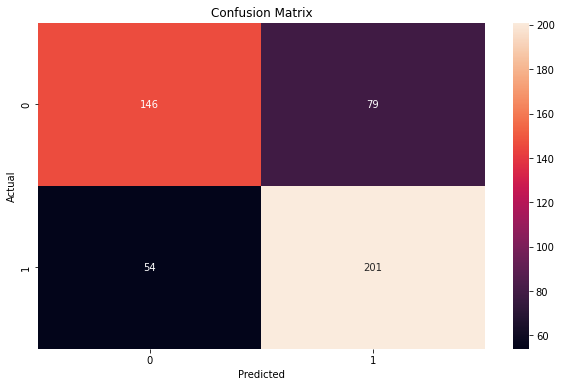

(0.7618025751072961, 0.7486631016042781)

In [257]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=40, max_depth=2)

In [26]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=40, max_depth=2,feature_analysis=True,max_leaf_nodes=50,min_samples_leaf=5,cm=False)

Training accuracy: 0.7414
Validation accuracy: 0.7487
Feature Importance Ranking:
Feature 11: 0.4134
Feature 2: 0.1873
Feature 10: 0.1186
Feature 7: 0.1004
Feature 8: 0.0833
Feature 1: 0.0335
Feature 3: 0.0311
Feature 5: 0.0223
Feature 9: 0.0077
Feature 4: 0.0018
Feature 6: 0.0005


(0.7414163090128756, 0.7486631016042781)

Training accuracy: 0.8026
Validation accuracy: 0.7647
Confusion Matrix:


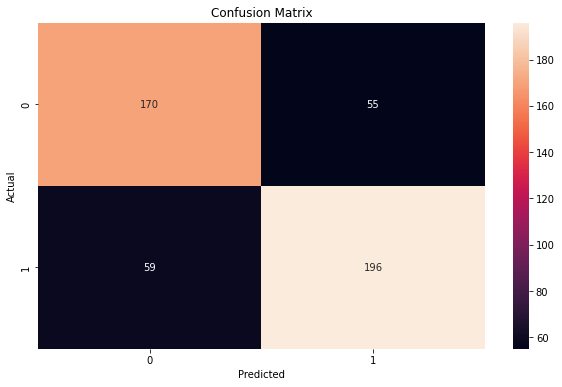

(0.8025751072961373, 0.7647058823529411)

In [25]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=60, max_depth=4)

In [37]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=60, max_depth=4,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=5,cm=False)

Training accuracy: 0.7833
Validation accuracy: 0.7433


(0.7832618025751072, 0.7433155080213903)

In [38]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=60, max_depth=4,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=10,cm=False)

Training accuracy: 0.7790
Validation accuracy: 0.7594


(0.778969957081545, 0.7593582887700535)

In [39]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=60, max_depth=4,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=30,cm=False)

Training accuracy: 0.7607
Validation accuracy: 0.7487


(0.7607296137339056, 0.7486631016042781)

In [40]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=60, max_depth=4,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=40,cm=False)

Training accuracy: 0.7725
Validation accuracy: 0.7647


(0.7725321888412017, 0.7647058823529411)

In [346]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=5,feature_analysis=False,max_leaf_nodes=50,min_samples_leaf=4,cm=False)

Training accuracy: 0.8283
Validation accuracy: 0.7433


(0.8283261802575107, 0.7433155080213903)

In [285]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=10, max_depth=10,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=100,cm=False)

Training accuracy: 0.7500
Validation accuracy: 0.7005


(0.75, 0.7005347593582888)

In [31]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=10, max_depth=5,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=100,cm=False)

Training accuracy: 0.7242
Validation accuracy: 0.7380


(0.7242489270386266, 0.7379679144385026)

In [307]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=10, max_depth=10,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=100,cm=False)

Training accuracy: 0.7639
Validation accuracy: 0.7059


(0.7639484978540773, 0.7058823529411765)

In [308]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=100,feature_analysis=False,max_leaf_nodes=500,min_samples_leaf=5,cm=False)

Training accuracy: 0.9195
Validation accuracy: 0.7219


(0.9195278969957081, 0.7219251336898396)

**Analysis of the impact of hyperparameters**

After altering different parameters, we observe that the number of estimators such as 60 is optimal as lesser lead to underfit and greater lead to overfit.

Increasing and decreasing the n_estimators, underfits and overfits the model, and gives better performance for n_estimator=60 with depth=4 .
Also, varying the max_depth except max_depth=4 leads to overfitting and misclassification.

Overall these parameters have strong influence on performance and must be optimal for best results.
Thus for hper parameter n_estimators=60 and max_depth=4, the model gives the best performance.

There are various other parameters like max features, max splits etc that help perform some regularization and find the model that best fits.

**Final Models for ensemble**

In [49]:
#Logistic Regression
scores = []
# Using hyper parameter - solver = "lbfgs" and max_iter=5000 and different values of 'C'

lr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=0.05)
train_acc,val_acc = perform_multi_logistic_reg(X_train, y_train,"Training Dataset",solver='lbfgs',C=0.05)
scores.append(['Logistic Regression','Lbfgs solver',train_acc,val_acc])

Training Dataset training accuracy: 0.7393
Training Dataset validation accuracy: 0.7540


In [50]:
#SVM
svm_clf = SVC(kernel='linear',probability = True)
train_acc,val_acc = try_kernels('linear',cm=False,c=10,g=0.1,)
scores.append(['SVM','rbf kernel',train_acc,val_acc])

Fitting model with linear kernal : 

Training accuracy: 0.7339055793991416
Validation accuracy: 0.7165775401069518 

-------------------------------------------------------------------------------- 



In [51]:
#Random Forest Estimator
rf_clf = RandomForestClassifier(n_estimators=60, max_depth=4)
train_acc,val_acc = perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=60, max_depth=4,feature_analysis=False,cm=False)
scores.append(['Random Forest','default params',train_acc,val_acc])

Training accuracy: 0.7951
Validation accuracy: 0.7487


**Ensemble Learning**

In [52]:
#Hard Voting Classifier
def evaluate_accuracy(model):
    model.fit(X_train,y_train)
    t_score = model.score(X_train,y_train)
    print("Accuracy on training data:",t_score)
    p_score = model.score(X_val,y_val)
    print("Accuracy on validation data:",p_score)
    return [t_score, p_score]

model = VotingClassifier(estimators=[('svm',svm_clf),('rf',rf_clf),('lr',lr_clf)],voting='hard')
acc = evaluate_accuracy(model)
scores.append({
      'Voting Classifier'
      'hard',
    acc[0],
    acc[1]
})

Accuracy on training data: 0.7424892703862661
Accuracy on validation data: 0.7379679144385026


In [53]:
#Soft Voting Classifier
model = VotingClassifier(estimators=[('svm',svm_clf),('rf',rf_clf),('lr',lr_clf)],voting='soft')
acc = evaluate_accuracy(model)
scores.append({
      'Voting Classifier',
      'soft',
    acc[0],
    acc[1]
})

Accuracy on training data: 0.7628755364806867
Accuracy on validation data: 0.7540106951871658


In [55]:
#Stacking
estimator = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
model = StackingClassifier(estimators=[('lr',lr_clf),('svm',svm_clf),('rf',rf_clf)],final_estimator=estimator)
acc = evaluate_accuracy(model)
scores.append({
      'model':'Stacking',
      'best params':'AdaBoost',
    'training accuracy':acc[0],
    'validation accuracy':acc[1]
})

Accuracy on training data: 0.7832618025751072
Accuracy on validation data: 0.7647058823529411


In [56]:
#Stacking
estimator = AdaBoostClassifier(n_estimators=50,learning_rate=0.05)
model = StackingClassifier(estimators=[('lr',lr_clf),('svm',svm_clf),('rf',rf_clf)],final_estimator=estimator)
acc = evaluate_accuracy(model)
scores.append({
      'model':'Stacking',
      'best params':'AdaBoost',
    'training accuracy':acc[0],
    'validation accuracy':acc[1]
})

Accuracy on training data: 0.796137339055794
Accuracy on validation data: 0.7540106951871658


In [57]:
scores

[['Logistic Regression',
  'Lbfgs solver',
  0.7392703862660944,
  0.7540106951871658],
 ['SVM', 'rbf kernel', 0.7339055793991416, 0.7165775401069518],
 ['Random Forest', 'default params', 0.7950643776824035, 0.7486631016042781],
 {0.7379679144385026, 0.7424892703862661, 'Voting Classifierhard'},
 {0.7540106951871658, 0.7628755364806867, 'Voting Classifier', 'soft'},
 {'model': 'Stacking',
  'best params': 'AdaBoost',
  'training accuracy': 0.7896995708154506,
  'validation accuracy': 0.7647058823529411},
 {'model': 'Stacking',
  'best params': 'AdaBoost',
  'training accuracy': 0.7832618025751072,
  'validation accuracy': 0.7647058823529411},
 {'model': 'Stacking',
  'best params': 'AdaBoost',
  'training accuracy': 0.796137339055794,
  'validation accuracy': 0.7540106951871658}]

In [63]:
#Final Accuracy on Testing data 
estimator = AdaBoostClassifier(n_estimators=50,learning_rate=0.01)
model_final = StackingClassifier(estimators=[('lr',lr_clf),('svm',svm_clf),('rf',rf_clf)],final_estimator=estimator)
model_final.fit(X_train, y_train)
model_final.score(X_test,y_test)

0.7645833333333333

Final Analysis :

AdaBoost performs the best since all of the base estimators were weak learners and needed boosting. Since all of them were weak, average or maximum votes didn't help. On applying the trained model with base estimators = 50 and learing rate =0.01 on the test data, we get Accuracy of 76.45% which is greater than the validation accuracy of 74.5%. Thus AdaBoost classifier provided improves accuracy of the model.